In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris

# Display plots inline (for Jupyter Notebook)
%matplotlib inline


In [3]:
!pip install seaborn


Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris

# Display plots inline (for Jupyter Notebook)
%matplotlib inline


In [6]:
# Load the Iris dataset
iris = load_iris()

# Convert to DataFrame
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# Add target labels as a new column
df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

# 1. Display the first few rows
print("First 5 rows of the dataset:")
display(df.head())

# 2. Check data types and missing values
print("\nData types and null values:")
print(df.info())
print("\nMissing values in each column:")
print(df.isnull().sum())


First 5 rows of the dataset:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa



Data types and null values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   sepal length (cm)  150 non-null    float64 
 1   sepal width (cm)   150 non-null    float64 
 2   petal length (cm)  150 non-null    float64 
 3   petal width (cm)   150 non-null    float64 
 4   species            150 non-null    category
dtypes: category(1), float64(4)
memory usage: 5.1 KB
None

Missing values in each column:
sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64


In [7]:
# Drop rows with missing values (if any)
df_cleaned = df.dropna()

# Confirm the cleanup
print(f"\nShape after dropping missing values: {df_cleaned.shape}")



Shape after dropping missing values: (150, 5)


🔹 Basic Statistics:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000



🔹 Specific Column Stats (Sepal Length):
Mean: 5.84
Median: 5.80
Standard Deviation: 0.83

🔹 Mean values by species:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
species,,,,
setosa,5.006,3.428,1.462,0.246
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


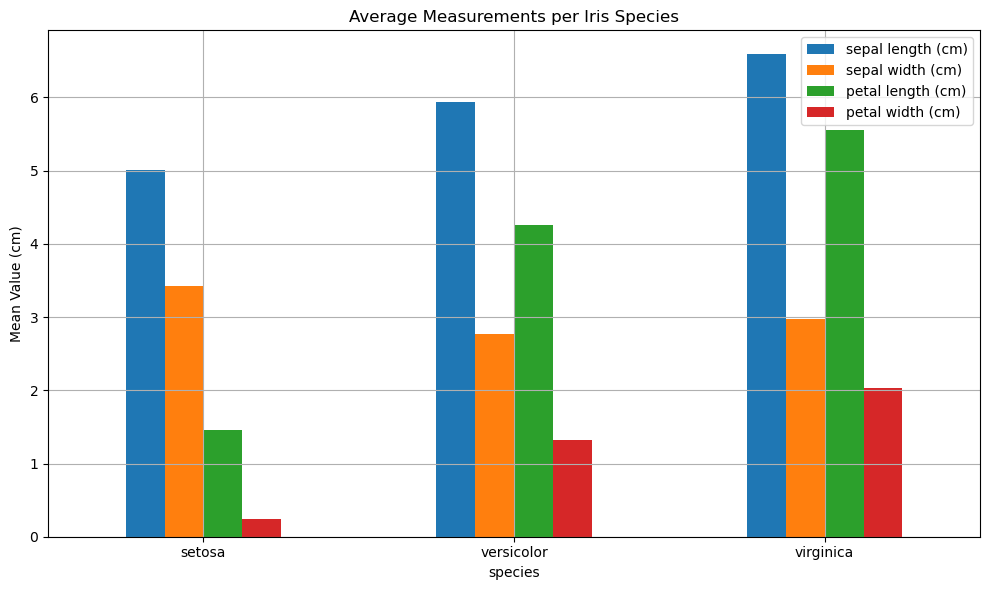

In [8]:
# Basic statistics of numerical columns
print("🔹 Basic Statistics:")
display(df.describe())

# Mean, median, and standard deviation for a specific column (e.g., sepal length)
print("\n🔹 Specific Column Stats (Sepal Length):")
print(f"Mean: {df['sepal length (cm)'].mean():.2f}")
print(f"Median: {df['sepal length (cm)'].median():.2f}")
print(f"Standard Deviation: {df['sepal length (cm)'].std():.2f}")

# Grouping by species and computing mean of all numerical columns
print("\n🔹 Mean values by species:")
grouped_means = df.groupby('species').mean(numeric_only=True)
display(grouped_means)

# Optional: Visualize grouped means
grouped_means.plot(kind='bar', figsize=(10,6), title='Average Measurements per Iris Species')
plt.ylabel("Mean Value (cm)")
plt.xticks(rotation=0)
plt.grid(True)
plt.tight_layout()
plt.show()


/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


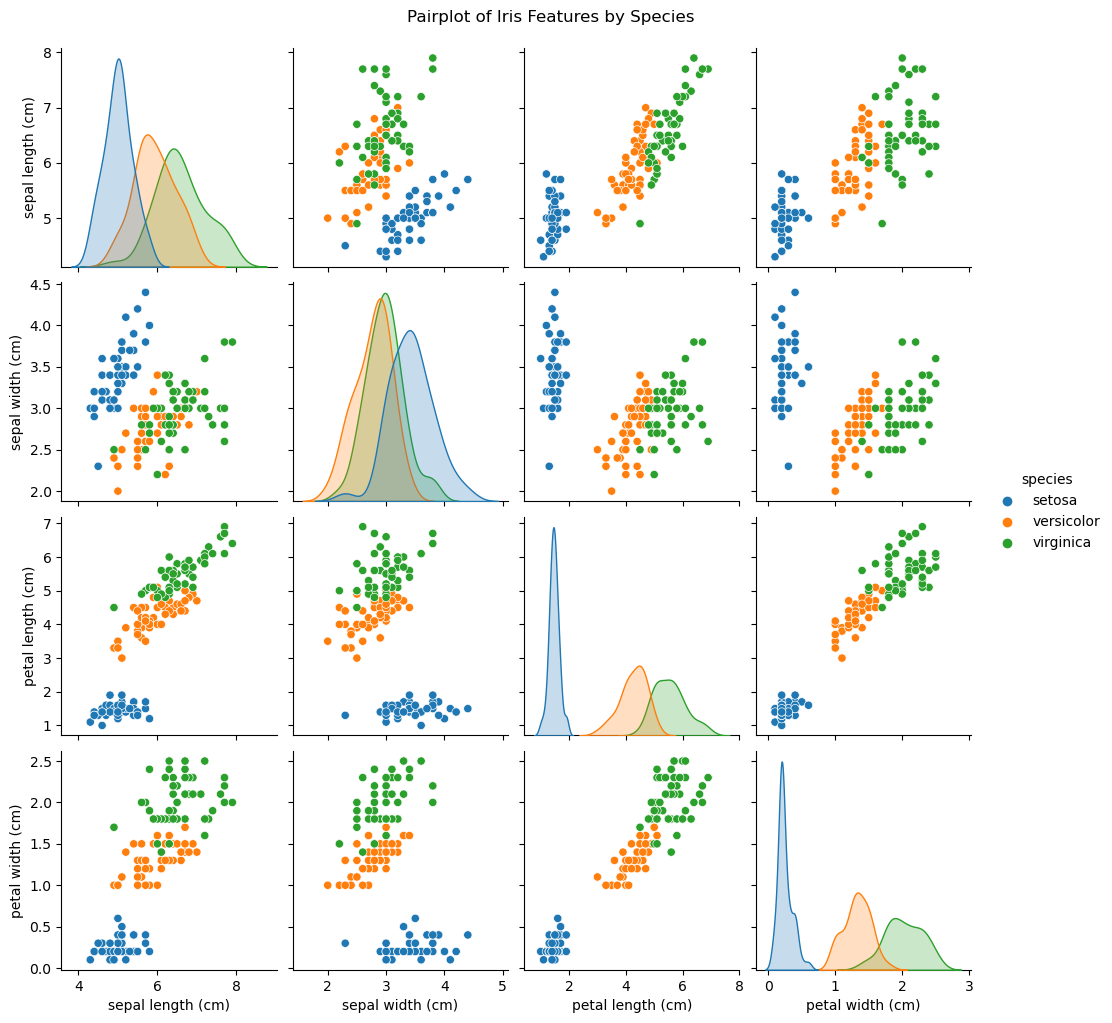

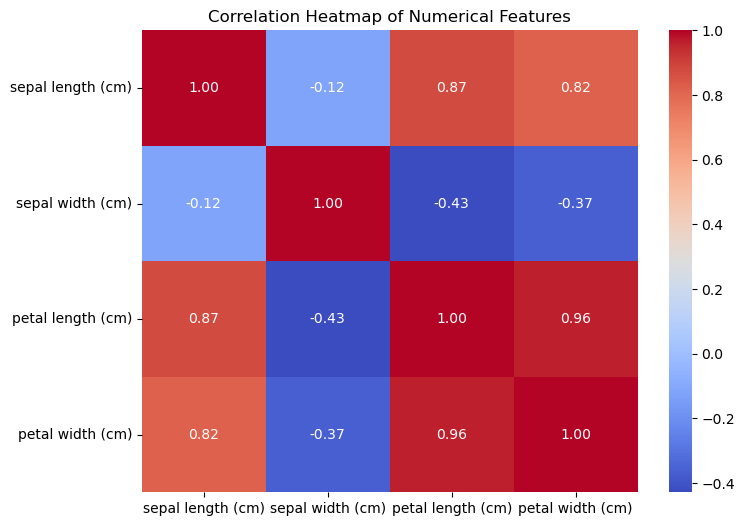

In [9]:
## Task 3: Data Visualization
# Pairplot to visualize relationships between all numerical features
sns.pairplot(df, hue='species')
plt.suptitle("Pairplot of Iris Features by Species", y=1.02)
plt.show()

# Correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Numerical Features")
plt.show()


Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



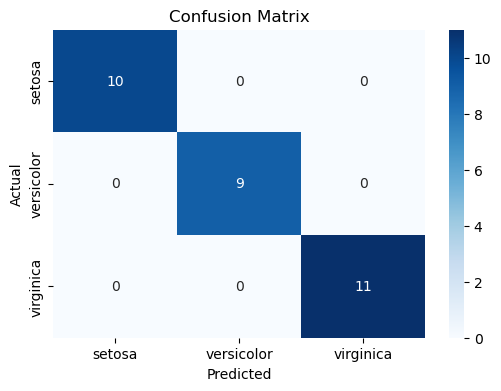

In [10]:
## Task 4: Classification Modeling
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

# Step 1: Prepare the data
X = df.drop('species', axis=1)  # Features
y = df['species']               # Target

# Step 2: Split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Step 4: Make predictions
y_pred = model.predict(X_test)

# Step 5: Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Step 6: Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
